<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




#1. Solución a la serie Exponencial  $E^n$


In [52]:
#Librerías:
import math as mt
import matplotlib.pyplot as plt



In [53]:
#Numero de iteraciones
n = 10
exp = 0
x = 0.3

#Ciclo para determinar el valor de la serie exp evaluado x:
for i in range(n+1):
  exp += ((-1)**(i)) * ((x**(i))/mt.factorial(i))

#Prueba del ciclo por medio de la libreria:
print("El valor por serie es: ", exp)
print("El valor definido por mt.exp es: ", mt.exp(-x))


El valor por serie es:  0.7408182206817611
El valor definido por mt.exp es:  0.7408182206817179


In [6]:
#Numero de iteraciones y valores iniciales:
exp = 0
x = 0.3
exp1 = 0
i=0

#Ciclo While para determinar errores a partir de la serie:
while 10e-7*abs(exp) <= exp1:
  exp += ((-1)**(i)) * (x**(i))/mt.factorial(i)
  exp1 = abs(((-1)**(i+1)) * ((x**(i+1))/mt.factorial(i+1)))
  i+=1

#Prueba con libreria y valor del error estimado con la serie:
print("El valor por serie es: ", exp)
print("El valor definido por mt.exp es: ", mt.exp(-x))
print("El error es: ", exp-mt.exp(-x))
print("El numero de iteraciones es: ",i)


El valor por serie es:  0.7408182624999999
El valor definido por mt.exp es:  0.7408182206817179
El error es:  4.1818282059402634e-08
El numero de iteraciones es:  7


In [34]:
#Para examinar los terminos para la serie r'$x\aprox 10$

#Condiciones iniciales:
n = 10
exp = 0
x = 10

#Ciclo para determinar el valor de la serie exp evaluado x:
for i in range(n+1):
  exp += ((-1)**(i)) * ((x**(i))/mt.factorial(i))
  if i==x-1:
    print("Cancelación casi perfecta en n = {}:{}".format(i,exp))

print("Aproximación de e^{-10} por serie para termino 10 es: ", exp)



Cancelación casi perfecta en n = 9:-1413.1446208112875
Aproximación de e^{-10} por serie para termino 10 es:  1342.5873015873017


In [43]:
#Verificación de precisiones con Librería definiendo un x grande:
x=345
a= mt.exp(-x)
b= 1/mt.exp(x)

print('Para x = ', x)
print('Para exp(-x) Tenemos el valor: ', a)
print('Para 1/exp(x) Tenemos el valor: ', b)

print('El valor por las dos formas son iguales:', a==b)

Para x =  345
Para exp(-x) Tenemos el valor:  1.473681879304291e-150
Para 1/exp(x) Tenemos el valor:  1.473681879304291e-150
El valor por las dos formas son iguales: True


In [50]:
# Verificando por medio de la serie:
#Numero de iteraciones
n = 30
exp = 0
x = 15
exp1 = 0

#Ciclo para determinar el valor de la serie exp(-x) evaluado x:
for i in range(n+1):
  exp += ((-1)**(i)) * ((x**(i))/mt.factorial(i))
  #ciclo para determinar el valor de la serie exp(-x) de la forma 1/exp(x):
  exp1 += 1/((x**(i))/mt.factorial(i))



print('Para x = ', x,'con',n ,'Iteraciones: ')
print('Para exp(-x) Tenemos el valor: ', exp)
print('Para 1/exp(x) Tenemos el valor: ', exp1)

print('El valor por las dos formas son iguales:', exp==exp1)

Para x =  15 con 30 Iteraciones: 
Para exp(-x) Tenemos el valor:  237.39769285752152
Para 1/exp(x) Tenemos el valor:  1.081008462508551
El valor por las dos formas son iguales: False


Por lo que se nota que las librerías nos dan una igualdad en las expresiones, pero la serie nos calcula un error bastante grande en el redondeo.


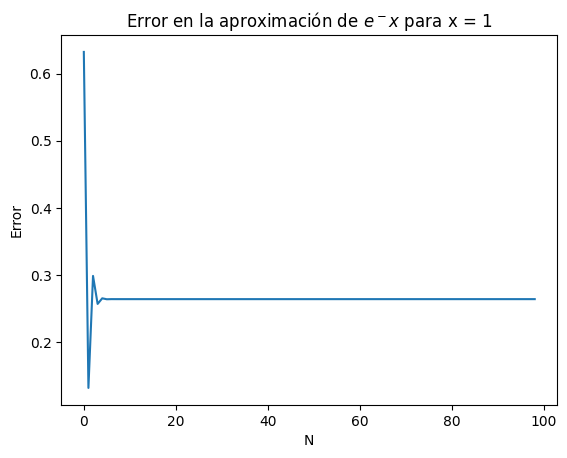

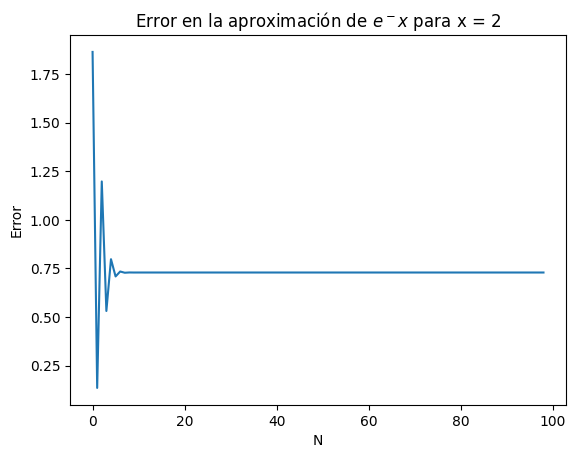

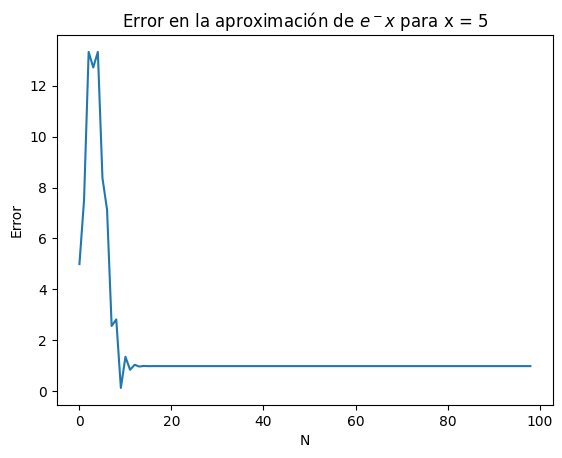

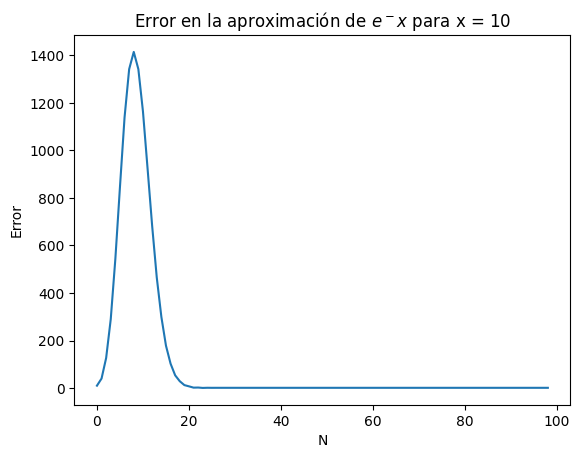

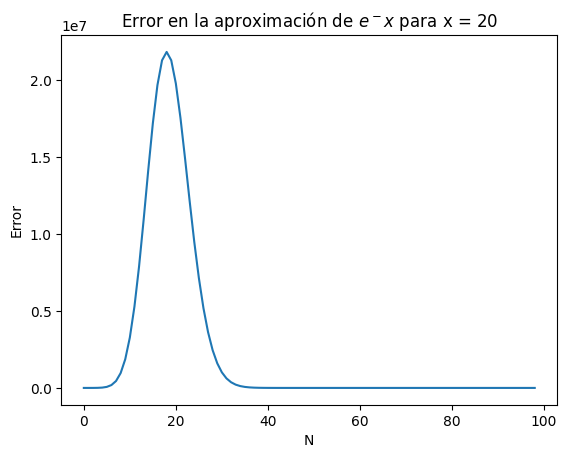

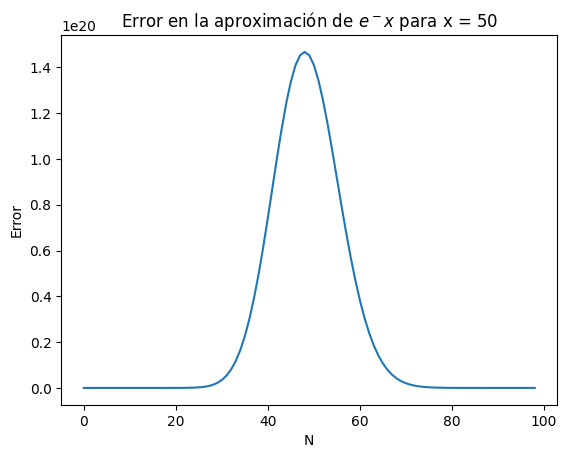

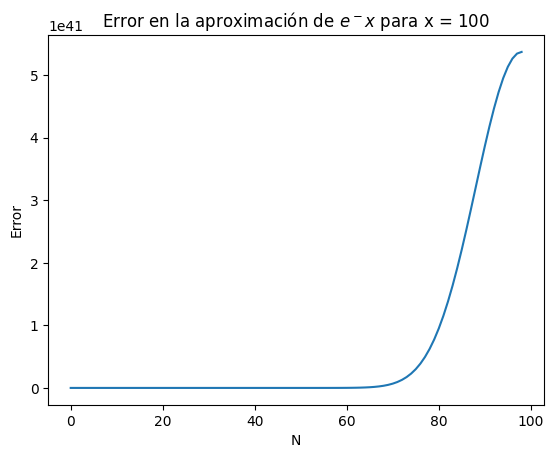

In [57]:
# Determiando cuando la serie pierde presición y cuando ya no converge:
def approx_e_to_the_minus_x(x):
    approx = 0
    true_value = mt.exp(-x)
    error = []
    for i in range(1, 100):
        term = ((-1)**(i-1) * x**i) / mt.factorial(i)
        approx += term
        error.append(abs(approx - true_value))
    plt.plot(error)
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.title('Error en la aproximación de $e^-x$ para x = {}'.format(x))
    plt.show()

for x in [1, 2, 5, 10, 20, 50, 100]:
    approx_e_to_the_minus_x(x)


#2. Cancelación sustractiva:


In [60]:
# Definimos la función S_1 para calcular la suma S(1)_N
def S_1(N):
    s = 0
    for n in range(1, (2*N)+1):
        s += ((-1)**n)* (n/ (n*(n+1)))
    return s

# Definimos la función S_2 para calcular la suma S(2)_N
def S_2(N):
    s = 0
    for n in range(1, N+1):
        s += (2*n)/(2*n+1) - (2*n-1)/(2*n)
    return s

# Definimos la función S_3 para calcular la suma S(3)_N
def S_3(N):
    s = 0
    for n in range(1, N+1):
        s += 1 / (2*n*(2*n+1))
    return s

# Definimos la función plot_error para trazar el gráfico del error relativo
def plot_error(N, S_func, label):
    E = []
    for n in range(1, N+1):
        E.append(abs((S_func(n) - S_3(n)) / S_3(n)))
    plt.loglog(range(1, N+1), E, label=label)

# Establecemos el valor de N
N = int(10**6)

# Trazamos los gráficos del error relativo para S(1)_N y S(2)_N
plot_error(N, S_1, 'S(1)')
plot_error(N, S_2, 'S(2)')
plt.xlabel('Log10(N)')
plt.ylabel('Log10(E)')
plt.legend()
plt.show()


KeyboardInterrupt: ignored